In [16]:
import pandas as pd

# Load the dataset
data = pd.read_csv('disney_plus_titles.csv')

# Display the first few rows of the dataset
print(data.head())

# Display summary information about the dataset
print(data.info())

# Display basic statistics of the dataset
print(data.describe(include='all'))

# Display the shape of the dataset (number of rows and columns)
print("Shape of the dataset:", data.shape)


  show_id     type                           title  \
0      s1    Movie                   A Spark Story   
1      s2    Movie                  Spooky Buddies   
2      s3    Movie          The Fault in Our Stars   
3      s4  TV Show                 Dog: Impossible   
4      s5  TV Show  Spidey And His Amazing Friends   

                     director  \
0  Jason Sterman, Leanne Dare   
1                Robert Vince   
2                  Josh Boone   
3                         NaN   
4                         NaN   

                                                cast                country  \
0                      Apthon Corbin, Louis Gonzales                    NaN   
1  Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...  United States, Canada   
2  Shailene Woodley, Ansel Elgort, Laura Dern, Sa...          United States   
3                                       Matt Beisner          United States   
4  Benjamin Valic, Lily Sanfelippo, Jakari Fraser...          United States   

 

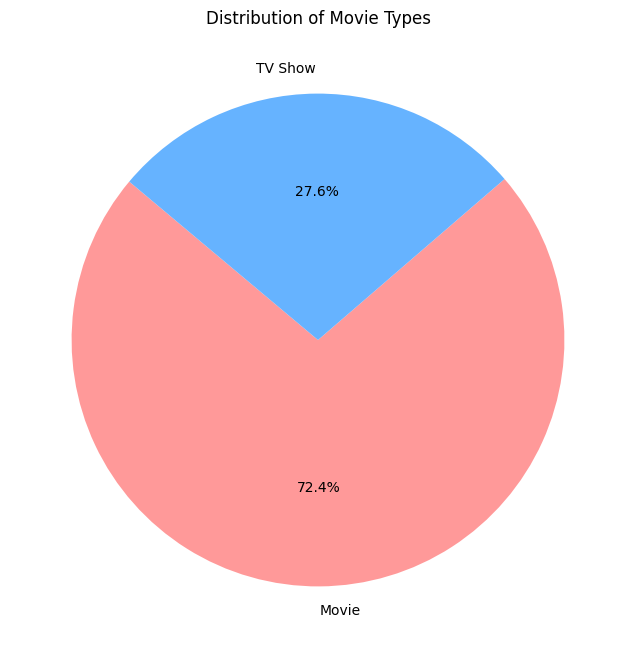

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('disney_plus_titles.csv')

# Pie chart for movie type distribution
type_counts = data['type'].value_counts()
plt.figure(figsize=(8, 8))
type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Movie Types')
plt.ylabel('')  # Hide the y-label
plt.show()


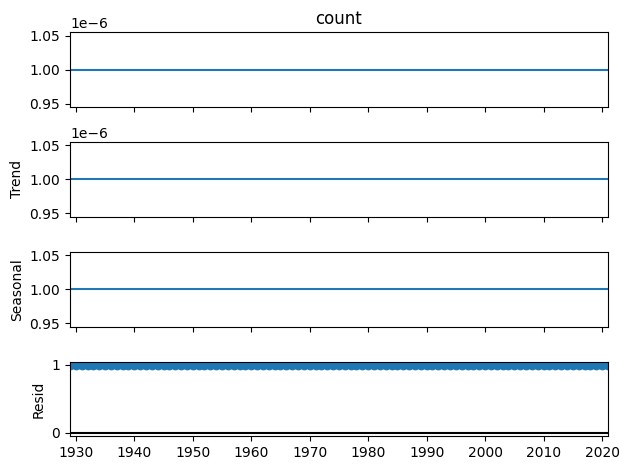

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


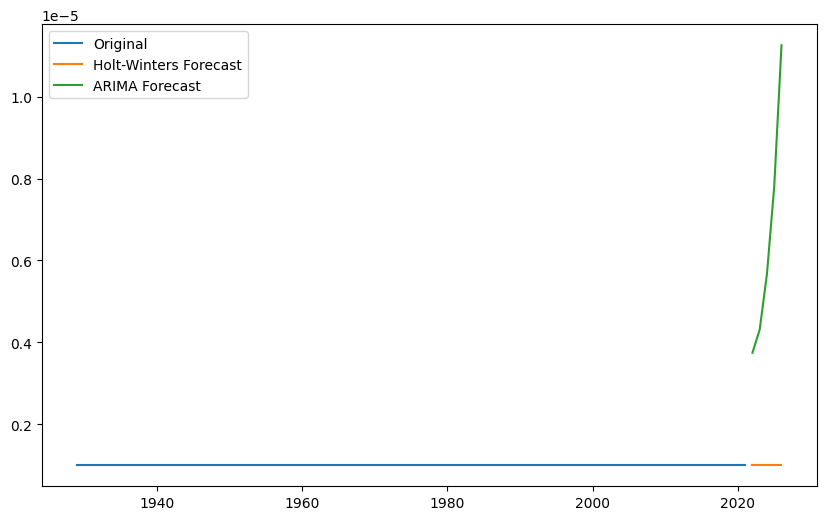

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

# Time Series Analysis: Number of movies released each year
yearly_data = data['release_year'].value_counts().sort_index()
yearly_data.index = pd.to_datetime(yearly_data.index, format='%Y')

# Ensure the index has a frequency and fill missing values
yearly_data = yearly_data.asfreq('Y').fillna(0)
yearly_data[yearly_data <= 0] = 1e-6

# Decompose the time series
decomposition = seasonal_decompose(yearly_data, model='multiplicative')
decomposition.plot()
plt.show()

# Exponential Smoothing (Holt-Winters)
model_hw = ExponentialSmoothing(yearly_data, seasonal='multiplicative', seasonal_periods=10).fit()
hw_forecast = model_hw.forecast(5)

# ARIMA model
model_arima = ARIMA(yearly_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 10)).fit()
arima_forecast = model_arima.forecast(5)

# Plot forecasts
plt.figure(figsize=(10, 6))
plt.plot(yearly_data.index, yearly_data, label='Original')
plt.plot(hw_forecast.index, hw_forecast, label='Holt-Winters Forecast')
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast')
plt.legend()
plt.show()


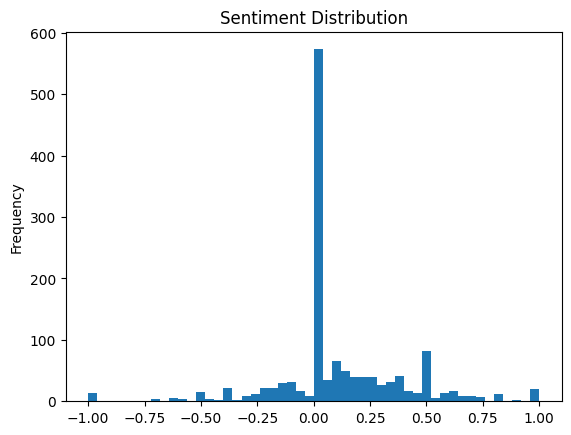

In [19]:
from textblob import TextBlob

# Sentiment Analysis on descriptions
data['sentiment'] = data['description'].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notnull(x) else 0)

# Visualize sentiment
data['sentiment'].plot(kind='hist', bins=50, title='Sentiment Distribution')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB
None


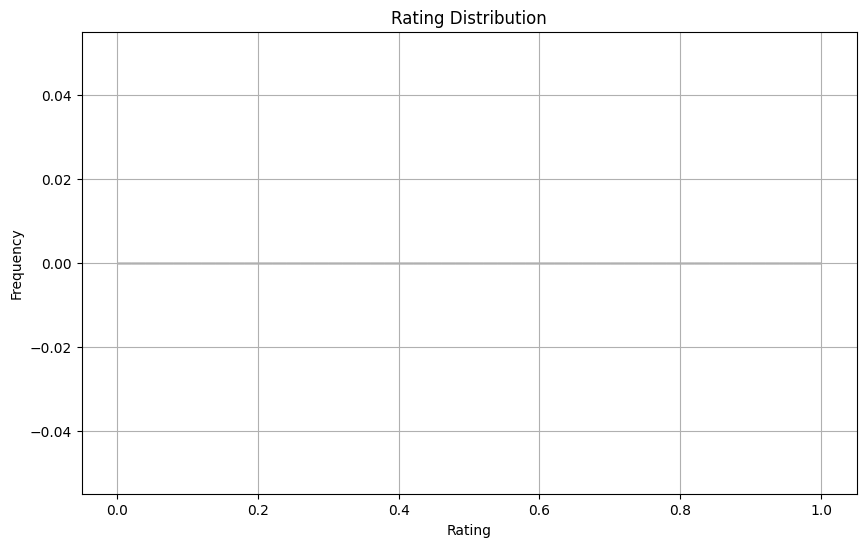

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('disney_plus_titles.csv')

# Check the structure of the dataset
print(data.info())

# Convert 'rating' to numeric
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Drop rows with missing values in 'rating'
data = data.dropna(subset=['rating'])

# Plot histogram of rating distribution
plt.figure(figsize=(10, 6))
plt.hist(data['rating'], bins=50, color='skyblue', edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Topic Modeling on descriptions
vectorizer = CountVectorizer(stop_words='english')
text_vectorized = vectorizer.fit_transform(data['description'].dropna())
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(text_vectorized)

# Display topics
for i, topic in enumerate(lda.components_):
    print(f"Topic {i}:")
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])
data.head()

Topic 0:
['extraordinary', 'adventures', 'friends', 'life', 'family', 'boy', 'story', 'join', 'disney', 'world']
Topic 1:
['save', 'finds', 'school', 'help', 'young', 'family', 'high', 'home', 'life', 'new']
Topic 2:
['star', 'goofy', 'family', 'pluto', 'mickey', 'disney', 'save', 'donald', 'advisory', 'details']
Topic 3:
['home', 'man', 'kids', 'young', 'story', 'time', 'friends', 'old', 'world', 'year']
Topic 4:
['high', 'help', 'series', 'school', 'evil', 'life', 'new', 'team', 'advisory', 'details']


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,sentiment
0,s1,0,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,0.0,88.0,Documentary,Two Pixar filmmakers strive to bring their uni...,0.000
1,s2,0,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,0.0,93.0,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...,0.000
2,s3,0,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,0.0,127.0,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...,0.650
3,s4,1,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,0.0,2.0,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...,0.375
4,s5,1,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,0.0,1.0,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...,0.000


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('disney_plus_titles.csv')

# Convert 'duration' to numeric (assuming it contains mixed types)
data['duration'] = pd.to_numeric(data['duration'], errors='coerce')

# Fill missing values in 'duration' with the mean
data['duration'].fillna(data['duration'].mean(), inplace=True)

# Convert 'rating' to numeric
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Fill missing values in 'rating' with the mean
data['rating'].fillna(data['rating'].mean(), inplace=True)

# Drop rows with any remaining NaN values
data.dropna(inplace=True)

# Check if there are any valid samples left
if data.shape[0] == 0:
    print("No valid samples remaining after preprocessing.")
else:
    # Prepare data for clustering
    X = data[['duration', 'rating']].values

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X)

    # Plot clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', label='Data Points')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Cluster Centers')
    plt.xlabel('Duration (minutes)')
    plt.ylabel('Rating')
    plt.title('K-Means Clustering of Movies')
    plt.legend()
    plt.show()

    print("Cluster centers:", kmeans.cluster_centers_)
    print("Labels:", kmeans.labels_)
data.head()


No valid samples remaining after preprocessing.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


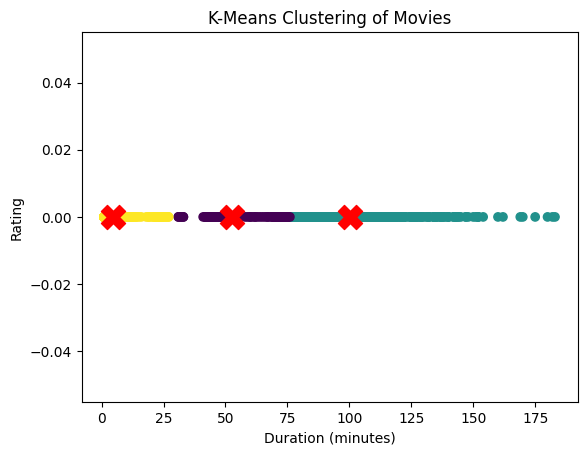

In [49]:
# Clustering based on movie features (duration and rating)
data = data.dropna(subset=['duration', 'rating'])
data['rating'] = pd.to_numeric(data['rating'], errors='coerce').fillna(0)
data = data.dropna(subset=['duration', 'rating']) # Drop rows with invalid ratings after conversion

# Now you can safely convert to float
data['rating'] = data['rating'].astype(float)

# Prepare the data for clustering
X = data[['duration', 'rating']].values

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.title('K-Means Clustering of Movies')
plt.show()


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('disney_plus_titles.csv')

# Convert 'duration' to numeric (assuming it contains mixed types)
data['duration'] = pd.to_numeric(data['duration'], errors='coerce')

# Fill missing values in 'duration' with the mean
data['duration'].fillna(data['duration'].mean(), inplace=True)

# Convert 'rating' to numeric
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Fill missing values in 'rating' with the mean
data['rating'].fillna(data['rating'].mean(), inplace=True)

# Check for and handle cases where all values might be NaN after conversion
if data['duration'].isnull().all() or data['rating'].isnull().all():
    print("All values in 'duration' or 'rating' are NaN after conversion. Cannot proceed.")
else:
    # Drop rows with any remaining NaN values
    data.dropna(inplace=True)

    # Prepare data for classification
    X = data[['duration', 'rating']].values
    y = data['type'].values

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest classifier
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Predict on test data
    y_pred = clf.predict(X_test)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Plotting bar graphs
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Bar graph for actual labels
    unique_labels, counts_actual = pd.unique(y_test, return_counts=True)
    axes[0].bar(unique_labels, counts_actual, color='skyblue')
    axes[0].set_xlabel('Actual Labels')
    axes[0].set_ylabel('Count')
    axes[0].set_title('Actual Labels Distribution')

    # Bar graph for predicted labels
    unique_labels, counts_predicted = pd.unique(y_pred, return_counts=True)
    axes[1].bar(unique_labels, counts_predicted, color='salmon')
    axes[1].set_xlabel('Predicted Labels')
    axes[1].set_ylabel('Count')
    axes[1].set_title('Predicted Labels Distribution')

    plt.tight_layout()
    plt.show()

    print("Accuracy:", accuracy)
    print("Classification Report:\n", class_report)

All values in 'duration' or 'rating' are NaN after conversion. Cannot proceed.


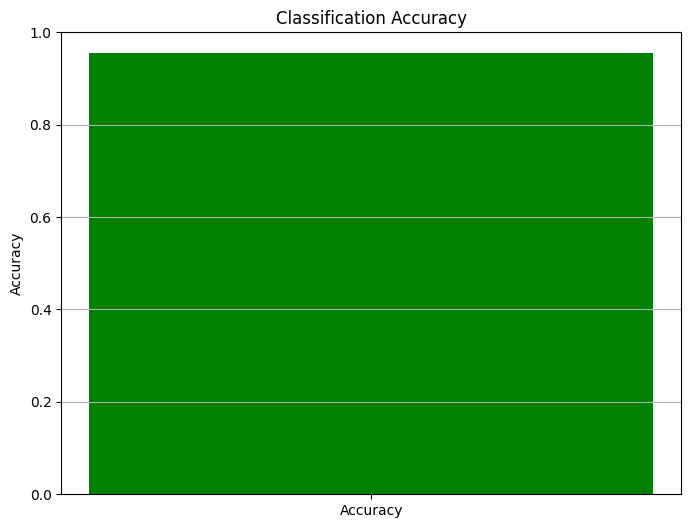

In [70]:
# Plot bar graph for classification accuracy
plt.figure(figsize=(8, 6))
plt.bar(['Accuracy'], [accuracy_score(y_test, y_pred)], color='green', width=0.4)
plt.ylim(0, 1)
plt.title('Classification Accuracy')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.show()


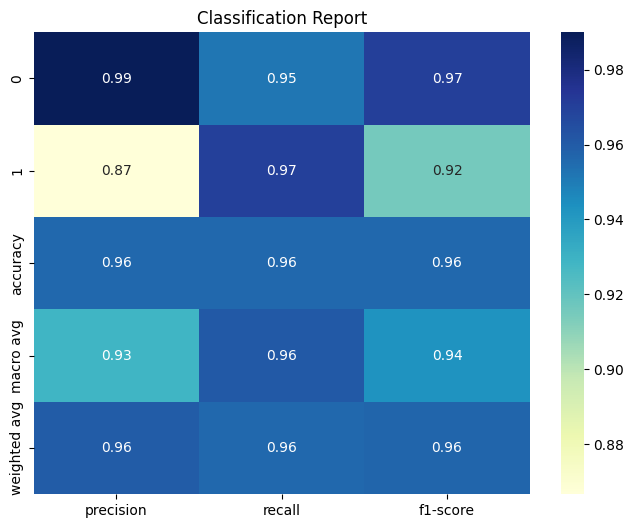

In [71]:
# Plot classification report (if needed, for detailed visualization)
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='YlGnBu')
plt.title('Classification Report')
plt.show()


In [50]:
print("Cluster centers:", kmeans.cluster_centers_)
print("Labels:", kmeans.labels_)

# Classification based on movie features (duration and rating)
data['type'] = data['type'].astype('category').cat.codes

# Prepare the data for classification
X = data[['duration', 'rating']].values
y = data['type'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Cluster centers: [[ 52.66292135   0.        ]
 [100.39638158   0.        ]
 [  4.75862069   0.        ]]
Labels: [1 1 1 ... 2 2 2]
Accuracy: 0.9562043795620438
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       207
           1       0.87      0.97      0.92        67

    accuracy                           0.96       274
   macro avg       0.93      0.96      0.94       274
weighted avg       0.96      0.96      0.96       274

